In [2]:
import numpy as np 
#numpy를 임폴트한다. 앞으로 np로 부른다. numpy는 list를 처리
import pandas as pd 
#pandas를 임폴트한다. pandas는 데이터프레임을 처리

import seaborn as sns 
#matplotlib을 기반으로 다양한 색상 테마
from matplotlib import pyplot as plt 
#데이터를 차트나 플롯으로 그려주는 라이브러리 패키지로서 사용되는 데이터 시각화 패키지
sns.set_style("whitegrid")
%matplotlib inline 
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

import warnings 
#버그의 원인이 될 수 있음
warnings.filterwarnings("ignore") 
#버그를 해결하는 방법은 무시하기!

import os 
print(os.listdir("C:/Users/0114m/Downloads/titanic"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [3]:
training = pd.read_csv("C:/Users/0114m/Downloads/titanic/train.csv")
testing = pd.read_csv("C:/Users/0114m/Downloads/titanic/test.csv")
 #pd.read_csv() 함수: pandas 라이브러리의 read_csv()함수를 사용해 외부 text파일,csv파일을 불러와 데이터 프레임으로 저장하는 방법
 #import로 pandas 라이브러리를 호출한 다음 괄호 안에 (파일경로와 파일이름)을 적으면 됨   

In [4]:
training.head() #트레이닝 데이터에서 디폴트로 5개의 관측값을 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
testing.head() #테스팅 데이터에서 디폴트로 처음 6개의 관측값을 출력

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
types_train = training.dtypes 
#dtypes는 데이터 형태를 확인함 DataFrame의 컬럼들은 각 특별한 자료형을 갖고 있는데 이는 DataFrame 내에 있는 dtypes라는 속성을 통해 확인 가능
num_values = types_train[(types_train == float)] 
#트레인 데이터 타입은 실수형/파이썬의 기본적인 소수점은 float64로 잡힘. 기본적 문자열은 str이 아니라 object라는 자료형으로 나타냄

print("These are the numerical features:") # 출력한다
print(num_values) #num_values를 출력한다.

These are the numerical features:
Age     float64
Fare    float64
dtype: object


In [8]:
training.describe() 
#생성했던 DataFrame의 간단한 통계 정보를 보여줌 ex) 개수(count),데이터 평균값(mean),표준편차(std),최솟값(min),4분위수(25%,50%,75%),최댓값(max)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
def null_table(training, testing): 
    #def는 함수를 만들 때 사용하는 예약어로, null_table을 만든다 근데,, 파이썬에는 null이 없고, 대신 None이 있다네요..? 뭘까요 흑ㅜ
    
    print("Training Data Frame") #트레이닝 데이터 프레임을 출력
    print(pd.isnull(training).sum()
        # 분석할 DataFrame을 생성했으면 결측값(missing value)이 있는지 확인&조치하여야 함. isnull()메소드로 결측값이 있는지 확인
          
    print(" ")
          
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


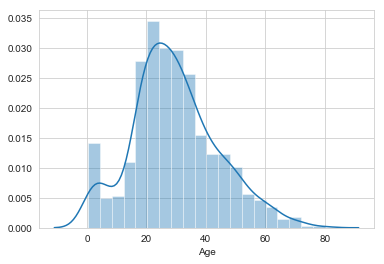

In [11]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

In [12]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [13]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [14]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


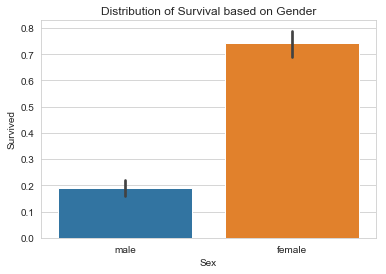

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [15]:
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

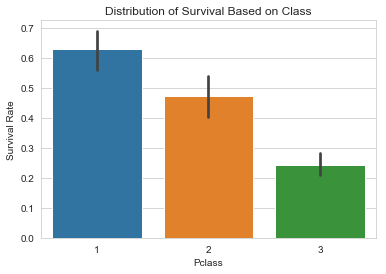

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [16]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

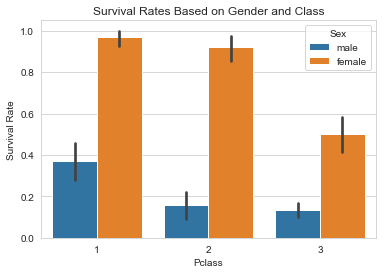

In [17]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

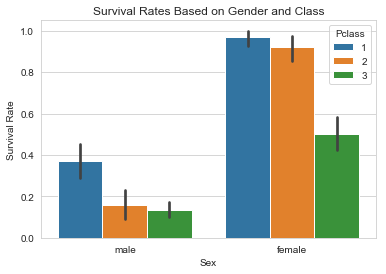

In [18]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

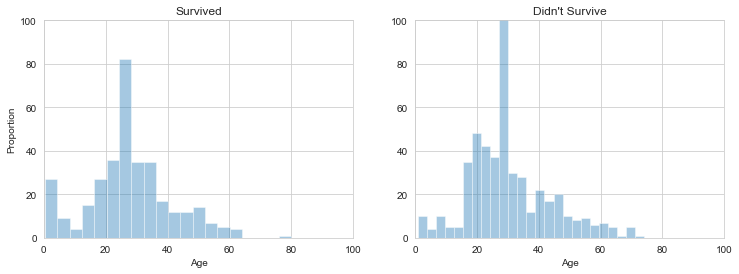

In [19]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

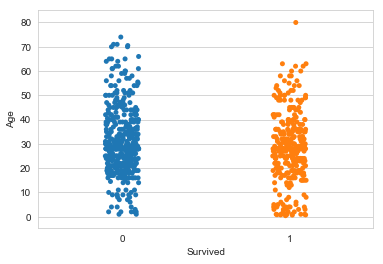

In [20]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

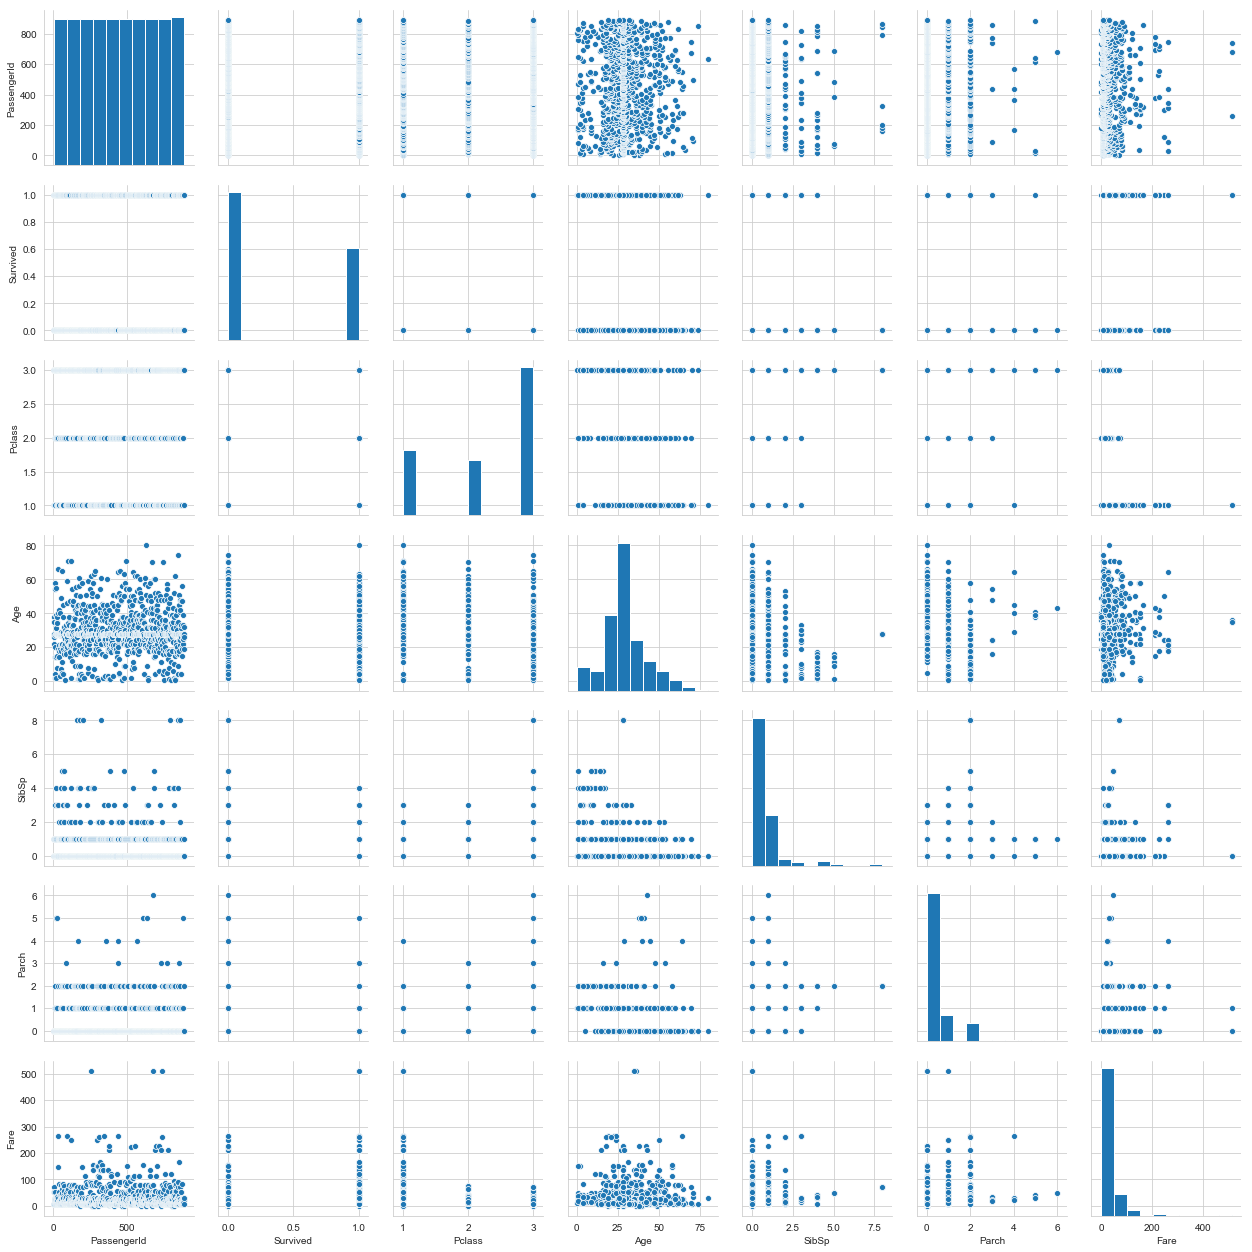

In [21]:
sns.pairplot(training)

In [22]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,13.0000,S
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,8.0500,S
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,7.4958,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,56.4958,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,7.9250,S


In [23]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
313,1205,3,"Carr, Miss. Jeannie",female,37.0,0,0,7.7500,Q
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,81.8583,S
87,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,8.0500,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,61.1750,S
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,27.0,0,0,15.5792,C


In [24]:
set(training["Embarked"])

{'C', 'Q', 'S'}

In [25]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

#Here's how to do it manually in Python without packages
"""
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2
"""

'\ntraining.loc[training["Sex"] == "male", "Sex"] = 0\ntraining.loc[training["Sex"] == "female", "Sex"] = 1\n\ntraining.loc[training["Embarked"] == "S", "Embarked"] = 0\ntraining.loc[training["Embarked"] == "C", "Embarked"] = 1\ntraining.loc[training["Embarked"] == "Q", "Embarked"] = 2\n\ntesting.loc[testing["Sex"] == "male", "Sex"] = 0\ntesting.loc[testing["Sex"] == "female", "Sex"] = 1\n\ntesting.loc[testing["Embarked"] == "S", "Embarked"] = 0\ntesting.loc[testing["Embarked"] == "C", "Embarked"] = 1\ntesting.loc[testing["Embarked"] == "Q", "Embarked"] = 2\n'

In [26]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",0,28.0,1,0,82.1708,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,2
44,45,1,3,"Devaney, Miss. Margaret Delia",0,19.0,0,0,7.8792,1
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",0,18.0,1,0,17.8000,2
210,211,0,3,"Ali, Mr. Ahmed",1,24.0,0,0,7.0500,2


In [27]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
367,1259,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",0,22.00,0,0,39.6875,2
62,954,3,"Bjorklund, Mr. Ernst Herbert",1,18.00,0,0,7.7500,2
122,1014,1,"Schabert, Mrs. Paul (Emma Mock)",0,35.00,1,0,57.7500,0
314,1206,1,"White, Mrs. John Stuart (Ella Holmes)",0,55.00,0,0,135.6333,0
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",0,0.17,1,2,20.5750,2


In [28]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [29]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [30]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [31]:
training.head() #Title column added

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [32]:
titles = set(training["Title"]) #making it a set gets rid of all duplicates
print(titles)

{'Mr', 'Col', 'Jonkheer', 'Mrs', 'Lady', 'Mme', 'Sir', 'Miss', 'Rev', 'Major', 'Ms', 'Capt', 'Don', 'Master', 'Countess', 'Dr', 'Mlle'}


In [33]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[517, 2, 1, 125, 1, 1, 1, 182, 6, 2, 1, 1, 1, 40, 1, 7, 2]


In [34]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0         Mr        517
1        Col          2
2   Jonkheer          1
3        Mrs        125
4       Lady          1
5        Mme          1
6        Sir          1
7       Miss        182
8        Rev          6
9      Major          2
10        Ms          1
11      Capt          1
12       Don          1
13    Master         40
14  Countess          1
15        Dr          7
16      Mlle          2


In [35]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

#Again, here's how to do it manually
"""
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6
"""

'\ntraining.loc[training["Title"] == "Miss", "Title"] = 0\ntraining.loc[training["Title"] == "Mr", "Title"] = 1\ntraining.loc[training["Title"] == "Mrs", "Title"] = 2\ntraining.loc[training["Title"] == "Master", "Title"] = 3\ntraining.loc[training["Title"] == "Dr", "Title"] = 4\ntraining.loc[training["Title"] == "Rev", "Title"] = 5\ntraining.loc[training["Title"] == "Other", "Title"] = 6\n\ntesting.loc[testing["Title"] == "Miss", "Title"] = 0\ntesting.loc[testing["Title"] == "Mr", "Title"] = 1\ntesting.loc[testing["Title"] == "Mrs", "Title"] = 2\ntesting.loc[testing["Title"] == "Master", "Title"] = 3\ntesting.loc[testing["Title"] == "Dr", "Title"] = 4\ntesting.loc[testing["Title"] == "Rev", "Title"] = 5\ntesting.loc[testing["Title"] == "Other", "Title"] = 6\n'

In [36]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [37]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
72,73,0,2,1,21.0,0,0,73.500,2,1,1,3
292,293,0,2,1,36.0,0,0,12.875,0,1,1,3
690,691,1,1,1,31.0,1,0,57.000,2,2,0,3
517,518,0,3,1,28.0,0,0,24.150,1,1,1,3
848,849,0,2,1,28.0,0,1,33.000,2,2,0,6


In [38]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
53,945,1,0,28.0,3,2,263.0000,2,6,0,2
62,954,3,1,18.0,0,0,7.7500,2,1,1,3
403,1295,1,1,17.0,0,0,47.1000,2,1,1,3
249,1141,3,0,27.0,1,0,14.4542,0,2,0,4
104,996,3,0,16.0,1,1,8.5167,0,3,0,4


In [39]:
In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

#You can try with MinMaxScaler as well to see how it performs in comparison, just replace StandardScaler with MinMaxScaler

SyntaxError: invalid syntax (<ipython-input-39-438a4c955e8e>, line 1)

In [ ]:
training.head()

In [ ]:
testing.head()